# DD2421 Lab 1

**Authors:** Navid Farhadi (nfarhadi@kth.se), Arturs Kurzemnieks (artursk@kth.se)

**Course Instance:** DD2421 Machine Learning VT19

### Assignment 0

MONK-2 is probably the hardest to learn as the truth concept behind it is the most complex, containing the most clauses. It can be expressed as a disjunction of all possible pairs of attributes, i.e., $(a_1 \land a_2) \lor (a_1 \land a_3) \lor ... \lor (a_5 \land a_6)$

A decision tree can represent arbitrary boolean functions therefore all of them can be learned but the truth concept in MONK-2 has a lot more possible combinations of attributes that can make it true. 

### Assignment 1

In [1]:
import monkdata as m
import dtree

In [2]:
print("MONK-1 Entropy: " + str(dtree.entropy(m.monk1)))
print("MONK-2 Entropy: " + str(dtree.entropy(m.monk2)))
print("MONK-3 Entropy: " + str(dtree.entropy(m.monk3)))

MONK-1 Entropy: 1.0
MONK-2 Entropy: 0.957117428264771
MONK-3 Entropy: 0.9998061328047111


Dataset | Entropy
 ---| ---
MONK-1 | 1.0
MONK-2 | 0.957117428264771
MONK-3 | 0.9998061328047111

### Assignment 2

For a distribution of $n$ events, a uniform distribution will have the most uncertainty (all events are equally likely) and therefore the highest entropy value of $logn$. A non-uniform distribution (of size $n$) will always have lower entropy as it is more biased to some particular event(s), with the minimum entropy value being 0 if it is known that one particular event of the set will always happen. 

Example: Take a fair six-sided die with $p_1 = \frac{1}{6}, p_2 = \frac{1}{6}, ... , p_6 = \frac{1}{6}$. The distribution is uniform so we get that $ \text{Entropy} = -\sum_i p_i \text{log}_2p_i \approx 2.58$. If we instead take an unfair six-sided die with $p_1 = \frac{1}{10}, p_2 = \frac{1}{10}, ... , p_5 = \frac{1}{10}, p_6 = \frac{1}{2}$ we get that $\text{Entropy} \approx 2.18$.

### Assignment 3

In [3]:
print("MONK-1: ")
for i in range(6):
    print("a_" + str(i+1) + ": " + str(dtree.averageGain(m.monk1,m.attributes[i])))
    
print("MONK-2: ")
for i in range(6):
    print("a_" + str(i+1) + ": " + str(dtree.averageGain(m.monk2,m.attributes[i])))

print("MONK-3: ")
for i in range(6):
    print("a_" + str(i+1) + ": " + str(dtree.averageGain(m.monk3,m.attributes[i])))

MONK-1: 
a_1: 0.07527255560831925
a_2: 0.005838429962909286
a_3: 0.00470756661729721
a_4: 0.02631169650768228
a_5: 0.28703074971578435
a_6: 0.0007578557158638421
MONK-2: 
a_1: 0.0037561773775118823
a_2: 0.0024584986660830532
a_3: 0.0010561477158920196
a_4: 0.015664247292643818
a_5: 0.01727717693791797
a_6: 0.006247622236881467
MONK-3: 
a_1: 0.007120868396071844
a_2: 0.29373617350838865
a_3: 0.0008311140445336207
a_4: 0.002891817288654397
a_5: 0.25591172461972755
a_6: 0.007077026074097326


Dataset | $a_1$ | $a_2$ | $a_3$ | $a_4$ | $a_5$ | $a_6$
--- | --- | --- | --- | --- | --- | ---
MONK-1 | 0.07527255560831925 | 0.005838429962909286 | 0.00470756661729721 | 0.02631169650768228 | 0.28703074971578435 | 0.0007578557158638421
MONK-2 | 0.0037561773775118823 | 0.0024584986660830532 | 0.0010561477158920196 | 0.015664247292643818 | 0.01727717693791797 | 0.006247622236881467
MONK-3 | 0.007120868396071844 | 0.29373617350838865 | 0.0008311140445336207 | 0.002891817288654397 | 0.25591172461972755 | 0.007077026074097326

If we are using a single decision tree for all of the MONK data sets it is best to use $a_5$ since that has the highest average information gain across the attributes. However, if each MONK data set has its own decision tree then MONK-1 would use $a_5$, MONK-2 would use $a_5$, and MONK-3 would use $a_2$.

### Assignment 4

As the information gain is maximized, the entropy of the subsets $S_k$ decreases.

For greater information gain, logically the attribute chosen should have the most direct correlation with how the labels are split between the samples. If for some attribute value $k$ the labels are still distributed somewhat evenly, it indicates that the attribute having this particular value has little effect on the label, i.e., the entropy is high. 

A subset $S_k$ having smaller entropy means that the samples with the attribute value $k$ are more biased to some particular label. If all subsets $S_k$ have small entropy values, it's safe to conclude that the attribute we're looking at is in general strongly affecting the labeling, therefore choosing the attribute with the highest information gain is somewhat choosing the most obvious path, looking first at the attribute that gives the most obvious effect on the labeling.

After the split, the new resulting sets (subsets of original $S$) should have smaller entropy as the split was based on some attribute's effect on the labeling and most likely a higher number of samples with the same label ended up in the same subset. If the reduced set entropy is still higher than zero, it implies that there is still something else affecting the labeling. Then we can look at all the remaining attributes and how their values affect the entropy of the particular subset. 

### Building Desicion Trees

In [4]:
# Attribute a5 (index 4) value 1..4
subsets = [dtree.select(m.monk1, m.attributes[4], v) for v in range(1,5)]

for i, s in enumerate(subsets):
    entropy = dtree.entropy(s)
    print("\nSubset {}, entropy {}:".format(i+1, entropy))
    for attr in [0,1,2,3,4,5]:
        print(str("a_") + str(attr+1) +  ": " + str(dtree.averageGain(s, m.attributes[attr])))


Subset 1, entropy 0.0:
a_1: 0.0
a_2: 0.0
a_3: 0.0
a_4: 0.0
a_5: 0.0
a_6: 0.0

Subset 2, entropy 0.9383153522334069:
a_1: 0.040216841609413634
a_2: 0.015063475072186083
a_3: 0.03727262736015946
a_4: 0.04889220262952931
a_5: 0.0
a_6: 0.025807284723902146

Subset 3, entropy 0.9480782435939054:
a_1: 0.03305510013455182
a_2: 0.002197183539100922
a_3: 0.017982293842278896
a_4: 0.01912275517747053
a_5: 0.0
a_6: 0.04510853782483648

Subset 4, entropy 0.9081783472997051:
a_1: 0.20629074641530198
a_2: 0.033898395077640586
a_3: 0.025906145434984817
a_4: 0.07593290844153944
a_5: 0.0
a_6: 0.0033239629631565126


For the next level of the decision tree we have that $S_2$ has the highest gain for $a_4$, $S_3$ has the highest gain for $a_6$, and $S_4$ has the highest gain for $a_1$.

In [5]:
# a4
ss1 = [dtree.select(subsets[1], m.attributes[3], v) for v in range(1,4)]
print("a_4")
for ss in ss1:
    print(dtree.mostCommon(ss))

# a6
ss2 = [dtree.select(subsets[2], m.attributes[5], v) for v in range(1,3)]
print("a_6")
for ss in ss2:
    print(dtree.mostCommon(ss))

# a1 
ss3 = [dtree.select(subsets[3], m.attributes[0], v) for v in range(1,4)]
print("a_1")
for ss in ss3:
    print(dtree.mostCommon(ss))

a_4
False
False
False
a_6
False
False
a_1
False
False
True


From the above output we have that the decision tree up to the first two levels is the following (in text form): A5(+A4(---)A6(--)A1(--+))

We can generate the decision tree automatically as well:

In [6]:
tree = dtree.buildTree(m.monk1, m.attributes, 2)
print(tree)

A5(+A4(---)A6(--)A1(--+))


Our results are identical to the expected decision tree.

### Assignment 5

In [7]:
print("MONK-1: ")
monk1tree=dtree.buildTree(m.monk1, m.attributes)
print(dtree.check(monk1tree, m.monk1))
print(dtree.check(monk1tree, m.monk1test))

print("MONK-2: ")
monk2tree=dtree.buildTree(m.monk2, m.attributes)
print(dtree.check(monk2tree, m.monk2))
print(dtree.check(monk2tree, m.monk2test))

print("MONK-3: ")
monk3tree=dtree.buildTree(m.monk3, m.attributes)
print(dtree.check(monk3tree, m.monk3))
print(dtree.check(monk3tree, m.monk3test))

MONK-1: 
1.0
0.8287037037037037
MONK-2: 
1.0
0.6921296296296297
MONK-3: 
1.0
0.9444444444444444


Dataset | $E_{\text{train}}$ | $E_{\text{test}}$
 --- | --- | ---
MONK-1 | 1.0 | 0.8287037037037037
MONK-2 | 1.0 | 0.6921296296296297
MONK-3 | 1.0 | 0.9444444444444444

Assumptions were correct, as it can be seen that the tree for MONK-2 performs the worst on the test set, as expected.
For the training sets the accuracy is 100\% as the tree is modeled after it and the noise is low enough for all the samples to be correctly distributed between leaf nodes, therefore this number gives no further value in evaluating the performance of the tree.

### Assignment 6

Pruning is a way to reduce variance, making the classes more general, as a full-depth tree can be overfittedand perform worse on new data.  Of course, too much pruning (and thus a too shallow tree) can make thetree underfitted, not taking some features into account and introducing bias.

### Assignment 7

In [8]:
import random

def partition(data, fraction):
    ldata = list(data)
    random.shuffle(ldata)
    breakPoint = int(len(ldata) * fraction)
    return ldata[:breakPoint], ldata[breakPoint:]

def prune_while_improving(tree, data, score = None):
    best_score = 0
    if score is None:
        best_score = dtree.check(tree, data)
    else:        
        best_score = score
    best_tree = tree
    
    pruned = dtree.allPruned(tree)
    subtree_bests = [best_score for i in range(len(pruned))]
    subtree_best_trees = [tree for i in range(len(pruned))]
    for i,p in enumerate(pruned):
        p_score = dtree.check(p, data)
        if p_score > subtree_bests[i]:
            subtree_bests[i], subtree_best_trees[i] = prune_while_improving(p, data, p_score)
            
    best_score = max(subtree_bests)
    best_tree = subtree_best_trees[subtree_bests.index(best_score)]
    return best_score, best_tree

In [9]:
iterations_per_fraction = 200
fractions = [.3, .4, .5, .6, .7, .8]

# MONK-1
print("MONK-1:")
monk1_scores = []
for frac in fractions:
    test_scores = []
    for i in range(iterations_per_fraction):
        monk1train, monk1val = partition(m.monk1, frac)
        part_tree = dtree.buildTree(monk1train, m.attributes)
        best_score, best_tree = prune_while_improving(part_tree, monk1val)
        #print("Best in iteration: {}".format(best_score))
        test_scores.append(dtree.check(best_tree, m.monk1test))
    
    average_test_score = sum(test_scores) / iterations_per_fraction
    monk1_scores.append(test_scores)
    print("Average test score from pruning for fraction {}: {}\n".format(frac, average_test_score))

MONK-1:
Average test score from pruning for fraction 0.3: 0.7707407407407403

Average test score from pruning for fraction 0.4: 0.7953472222222215

Average test score from pruning for fraction 0.5: 0.8259027777777774

Average test score from pruning for fraction 0.6: 0.8373958333333323

Average test score from pruning for fraction 0.7: 0.8523726851851847

Average test score from pruning for fraction 0.8: 0.8599074074074068



In [10]:
# MONK-3
print("MONK-3:")
monk3_scores = []
for frac in fractions:
    test_scores = []
    for i in range(iterations_per_fraction):
        monk3train, monk3val = partition(m.monk3, frac)
        part_tree = dtree.buildTree(monk3train, m.attributes)
        best_score, best_tree = prune_while_improving(part_tree, monk3val)
        #print("Best in iteration: {}".format(best_score))
        test_scores.append(dtree.check(best_tree, m.monk3test))
    
    average_test_score = sum(test_scores) / iterations_per_fraction
    monk3_scores.append(test_scores)
    print("Average test score from pruning for fraction {}: {}\n".format(frac, average_test_score))

MONK-3:
Average test score from pruning for fraction 0.3: 0.9217129629629639

Average test score from pruning for fraction 0.4: 0.9392476851851861

Average test score from pruning for fraction 0.5: 0.9528703703703714

Average test score from pruning for fraction 0.6: 0.9562500000000012

Average test score from pruning for fraction 0.7: 0.958287037037038

Average test score from pruning for fraction 0.8: 0.9575694444444457



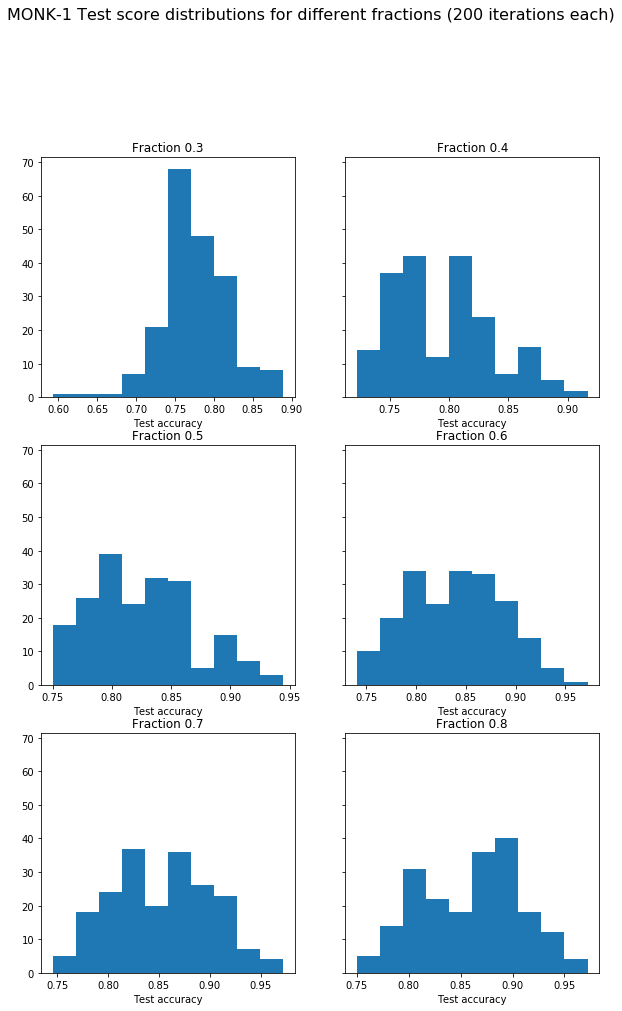

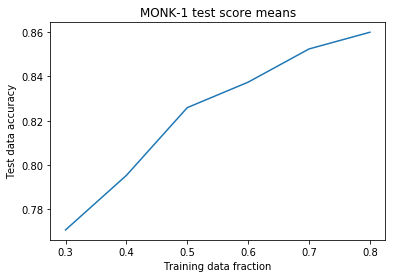

In [14]:
import matplotlib.pyplot as plt

monk1_means = [sum(scores)/len(scores) for scores in monk1_scores]

fig1, axs1 = plt.subplots(3,2, figsize=(10,15), sharey=True)
for i, frac in enumerate(fractions):
    figure = axs1.flatten()[i]
    figure.hist(monk1_scores[i])
    figure.set_xlabel("Test accuracy")
    figure.set_title("Fraction {}".format(frac))
    
fig1.suptitle("MONK-1 Test score distributions for different fractions ({} iterations each)".format(iterations_per_fraction), fontsize=16, y=1.02)

plt.figure()
plt.plot([.3, .4, .5, .6, .7, .8], monk1_means)
plt.ylabel('Test data accuracy')
plt.xlabel('Training data fraction')
plt.title("MONK-1 test score means")

plt.show()

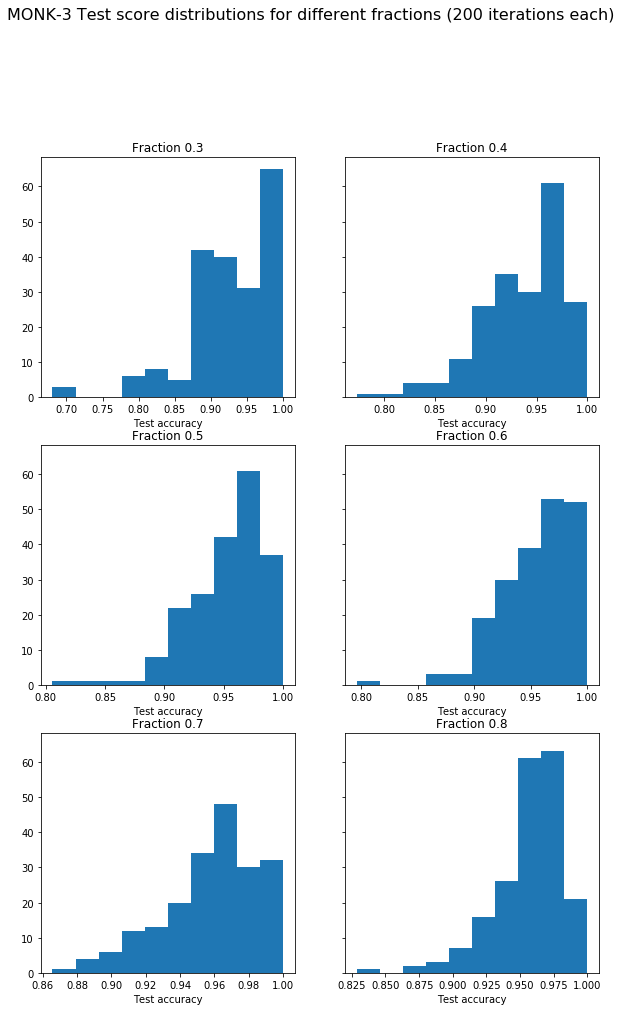

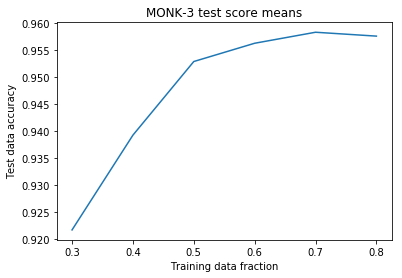

In [15]:
monk3_means = [sum(scores)/len(scores) for scores in monk3_scores]

fig3, axs3 = plt.subplots(3,2, figsize=(10,15), sharey=True)
for i, frac in enumerate(fractions):
    figure = axs3.flatten()[i]
    figure.hist(monk3_scores[i])
    figure.set_xlabel("Test accuracy")
    figure.set_title("Fraction {}".format(frac))
    
fig3.suptitle("MONK-3 Test score distributions for different fractions ({} iterations each)".format(iterations_per_fraction), fontsize=16, y=1.02)

plt.figure()
plt.plot([.3, .4, .5, .6, .7, .8], monk3_means)
plt.ylabel('Test data accuracy')
plt.xlabel('Training data fraction')
plt.title("MONK-3 test score means")

plt.show()